# IBM Data Science Capstone Project

# House Rental Price, Neighborhoods, and Venues in Calgary Study

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology and Analysis](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)


## 1. Introduction <a name="introduction"></a>

Calgary is the largest city in the western Canadian province of Alberta. With its abundant natural resources, Calgary is also recognized as a leader in the Canadian oil and gas industry. Calgary’s economy expanded at a significantly higher rate than the overall Canadian economy (43% and 25%, respectively) over the ten-year period from 1999 to 2009. The highly developed oil and gas industry also makes Calgary one of the best Canadian cities for engineers.

As an engineering student in Canada, there are a great number of my friends who want to start their career in Calgary. The first challenge they will encounter is the house renting problem. The objective of this project is to help those who are facing house renting problems in Calgary establish a clear understanding of neighborhoods and regional average renting prices in Calgary. This project would contribute to assisting newcomers in choosing the best-fit Calgary neighborhood to live.

Based on the problem, by the end of the project, one should be able to easily access information such as the number of top five venues in the area, average house rental price, and more by clicking the marker on the map. This project would provide the information needed for newcomers who want to rent a house, and help them decide where to rent a house in Calgary.


## 2. Data<a name="data"></a>

The following data has been used in order to complete the study
* The list of postal codes of Canada-T, which contains information about neighborhoods in Calgary, available at Wikipedia
* The venues information of neighborhoods in Calgary, which is found using Foursquare API 
* Average renting price of a specific area in Calgary, which is found using Rentometer 

### 2.1 Scrape the Wikipedia page to get information about neighborhoods in Calgary

In [1]:
import urllib.request

url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T'

target = urllib.request.urlopen(url)

In [2]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(target, "lxml")

In [3]:
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of postal codes of Canada: T - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"f0f7f084-10c5-446f-9eab-c6d471f6aa5f","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_T","wgTitle":"List of postal codes of Canada: T","wgCurRevisionId":968097521,"wgRevisionId":968097521,"wgArticleId":966937,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata",

In [4]:
soup.title.string

'List of postal codes of Canada: T - Wikipedia'

In [5]:
target_table = soup.find('table', class_='wikitable sortable')
target_table

<table class="wikitable sortable">
<tbody><tr>
<th>Postal Code
</th>
<th>Borough
</th>
<th>Neighborhood
</th>
<th>Latitude
</th>
<th>Longitude
</th></tr>
<tr>
<td>T1A
</td>
<td>Medicine Hat
</td>
<td>Central Medicine Hat
</td>
<td>50.036460
</td>
<td>-110.679250
</td></tr>
<tr>
<td>T2A
</td>
<td>Calgary
</td>
<td>Penbrooke Meadows, Marlborough
</td>
<td>51.049680
</td>
<td>-113.964320
</td></tr>
<tr>
<td>T3A
</td>
<td>Calgary
</td>
<td>Dalhousie, Edgemont, Hamptons, Hidden Valley
</td>
<td>51.126060
</td>
<td>-114.143158
</td></tr>
<tr>
<td>T4A
</td>
<td>Airdrie
</td>
<td>East Airdrie
</td>
<td>51.272450
</td>
<td>-113.986980
</td></tr>
<tr>
<td>T5A
</td>
<td>Edmonton
</td>
<td>West Clareview, East Londonderry
</td>
<td>53.5899
</td>
<td>-113.4413
</td></tr>
<tr>
<td>T6A
</td>
<td>Edmonton
</td>
<td>North Capilano
</td>
<td>53.5483
</td>
<td>-113.408
</td></tr>
<tr>
<td>T7A
</td>
<td>Drayton Valley
</td>
<td>Not assigned
</td>
<td>53.2165
</td>
<td>-114.9893
</td></tr>
<tr>
<td>T8A
</t


At this point, the target table has been located successfully. The next step is to transform the table into a Pandas dataframe.


In [6]:
Postal_code = []
Borough = []
Neighborhood = []
Latitude = []
Longitude = []

for row in target_table.findAll('tr'):
    cells = row.findAll('td')
    if len(cells)==5:
        Postal_code.append(cells[0].find(text=True))
        Borough.append(cells[1].find(text=True))
        Neighborhood.append(cells[2].find(text=True))
        Latitude.append(cells[3].find(text=True))
        Longitude.append(cells[4].find(text=True))
        
Postal_code = list(map(lambda x:x.rstrip("\n"), Postal_code))
Borough = list(map(lambda x:x.rstrip("\n"), Borough))
Neighborhood =list(map(lambda x:x.rstrip("\n"), Neighborhood))
Latitude =list(map(lambda x:x.rstrip("\n"), Latitude))
Longitude =list(map(lambda x:x.rstrip("\n"), Longitude))

In [7]:
import pandas as pd

df = pd.DataFrame(Postal_code, columns = ['PostalCode'])
df['Borough'] = Borough
df['Neighborhood'] = Neighborhood
df['Latitude'] = Latitude
df['Longitude'] = Longitude
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158
3,T4A,Airdrie,East Airdrie,51.272450,-113.986980
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413
...,...,...,...,...,...
175,T5Z,Edmonton,West Lake District,53.5966,-113.4882
176,T6Z,Not assigned,Not assigned,Not assigned,Not assigned
177,T7Z,Stony Plain,Not assigned,53.5202,-114.0135
178,T8Z,Not assigned,Not assigned,Not assigned,Not assigned



Now the whole table has been transformed into a dataframe. However, the data has to be cleaned before performing any analysis.


In [8]:
# Drop the row with unassigned borough
df_1 = df[df.Borough != "Not assigned"].reset_index(drop=True)
df_1

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158
3,T4A,Airdrie,East Airdrie,51.272450,-113.986980
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413
...,...,...,...,...,...
139,T1Z,Rocky View,Not assigned,Not assigned,Not assigned
140,T2Z,Calgary,"Douglas Glen, McKenzie Lake, Copperfield, East...",50.9023,-113.9873
141,T3Z,Redwood Meadows,Not assigned,50.9821,-114.5178
142,T5Z,Edmonton,West Lake District,53.5966,-113.4882


In [9]:
# Group by borough and postal codes
df_2 = df_1.groupby(["PostalCode", "Borough"], as_index=False).agg(lambda x: ", ".join(x))
df_2

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T1B,Medicine Hat,South Medicine Hat,50.0172,-110.651
2,T1C,Medicine Hat,North Medicine Hat,50.0556,-110.6822
3,T1G,Taber,Not assigned,49.7773,-112.158
4,T1H,Lethbridge,North Lethbridge,49.7118,-112.8196
...,...,...,...,...,...
139,T9N,Bonnyville,Not assigned,54.2678,-110.7324
140,T9S,Athabasca,Not assigned,54.7139,-113.2942
141,T9V,Lloydminster,Not assigned,53.2786,-110.0233
142,T9W,Wainwright,Not assigned,52.8403,-110.8704


In [10]:
# Replace unassigned neighborhoods with corresponding boroughs names
df_2['Neighborhood'] = df_2['Neighborhood'].replace('Not assigned', df_2['Borough'])
df_2

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T1B,Medicine Hat,South Medicine Hat,50.0172,-110.651
2,T1C,Medicine Hat,North Medicine Hat,50.0556,-110.6822
3,T1G,Taber,Taber,49.7773,-112.158
4,T1H,Lethbridge,North Lethbridge,49.7118,-112.8196
...,...,...,...,...,...
139,T9N,Bonnyville,Bonnyville,54.2678,-110.7324
140,T9S,Athabasca,Athabasca,54.7139,-113.2942
141,T9V,Lloydminster,Lloydminster,53.2786,-110.0233
142,T9W,Wainwright,Wainwright,52.8403,-110.8704


In [11]:
# Drop the data with unknown coordinates
df_2 = df_2[df_2.Latitude != "Not assigned"].reset_index(drop=True)
df_2

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T1B,Medicine Hat,South Medicine Hat,50.0172,-110.651
2,T1C,Medicine Hat,North Medicine Hat,50.0556,-110.6822
3,T1G,Taber,Taber,49.7773,-112.158
4,T1H,Lethbridge,North Lethbridge,49.7118,-112.8196
...,...,...,...,...,...
133,T9N,Bonnyville,Bonnyville,54.2678,-110.7324
134,T9S,Athabasca,Athabasca,54.7139,-113.2942
135,T9V,Lloydminster,Lloydminster,53.2786,-110.0233
136,T9W,Wainwright,Wainwright,52.8403,-110.8704


In [12]:
# Locate all neighborhoods in Calgary
df_calgary = df_2[df_2['Borough'].str.contains("Calgary")].reset_index(drop=True)
df_calgary

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,T1Y,Calgary,"Rundle, Whitehorn, Monterey Park",51.0759,-114.0015
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
2,T2B,Calgary,"Forest Lawn, Dover, Erin Woods",51.0318,-113.9786
3,T2C,Calgary,"Lynnwood Ridge, Ogden, Foothills Industrial, G...",50.9878,-114.0001
4,T2E,Calgary,"Bridgeland, Greenview, Zoo, YYC",51.0632,-114.0614
5,T2G,Calgary,"Inglewood, Burnsland, Chinatown, East Victoria...",51.0415,-114.0599
6,T2H,Calgary,"Highfield, Burns Industrial",50.9857,-114.0631
7,T2J,Calgary,"Queensland, Lake Bonavista, Willow Park, Acadia",50.9693,-114.0514
8,T2K,Calgary,"Thorncliffe, Tuxedo Park",51.0857,-114.0714
9,T2L,Calgary,"Brentwood, Collingwood, Nose Hill",51.0917,-114.1127



The dataframe df_calgary will be used in the further analysis section. Notice that there might be multiple neighborhoods in one row as they has the same postal code.


### 2.2 Foursquare API

In this section, credentials needed will be defined before implementing further analysis using Foursquare API.

In [13]:
CLIENT_ID = '' # Enter your Foursquare ID
CLIENT_SECRET = '' # Enter your Foursquare Secret
VERSION = '20200813' # Enter Foursquare API version
Limit = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

### 2.3 Average House Renting Prices

The average house renting prices are obtained using Rentometer. Average house renting prices for neighborhoods with the same postal code are found and wrote into a csv file. The csv file is availble at https://github.com/Alred21/Coursera_Capstone/blob/master/Calgary_Average_Rental.csv.


## 3. Methodology and Analysis<a name="methodology"></a>

In this project, the main objectives can be summerized as the following:
* Locate the areas interested and add the corresponding marker on the map
* Get the venues information of each area using Foursquare API
* Apply k-mean method and performing clustering
* Summerize the result of clustering and define the tags for each cluster
* Add average house renting prices data and classify them
* Calculate the distance from the city center of each area
* Get the top 5 venues in each area
* Add all the needed information to the map

Following codes clearly demostrate how to achieve those objectives.

### 3.1 Locate the neighborhoods and create the map

In [14]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [15]:
address = 'Calgary, AB'

geolocator = Nominatim(user_agent="YYC")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Calgary are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Calgary are 51.0534234, -114.0625892.


In [16]:
map_calgary = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat, lng, borough, neighborhood in zip(df_calgary['Latitude'], df_calgary['Longitude'], df_calgary['Borough'], df_calgary['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_calgary) 
map_calgary

### 3.2 Get the venues information using Foursquare API

In [79]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20200813' # Foursquare API version
Limit = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            Limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
Calgary_venues = getNearbyVenues(names = df_calgary['Neighborhood'],
                                   latitudes = df_calgary['Latitude'],
                                   longitudes = df_calgary['Longitude']
                                  )

Rundle, Whitehorn, Monterey Park
Penbrooke Meadows, Marlborough
Forest Lawn, Dover, Erin Woods
Lynnwood Ridge, Ogden, Foothills Industrial, Great Plains
Bridgeland, Greenview, Zoo, YYC
Inglewood, Burnsland, Chinatown, East Victoria Park, Saddledome
Highfield, Burns Industrial
Queensland, Lake Bonavista, Willow Park, Acadia
Thorncliffe, Tuxedo Park
Brentwood, Collingwood, Nose Hill
Mount Pleasant, Capitol Hill, Banff Trail
Kensington, Westmont, Parkdale, University
City Centre, Calgary Tower
Connaught, West Victoria Park
Elbow Park, Britannia, Parkhill, Mission
South Calgary (Altadore / Bankview / Richmond)
Oak Ridge, Haysboro, Kingsland, Kelvin Grove, Windsor Park
Braeside, Cedarbrae, Woodbine
Midnapore, Sundance
Millrise, Somerset, Bridlewood, Evergreen
Douglas Glen, McKenzie Lake, Copperfield, East Shepard
Dalhousie, Edgemont, Hamptons, Hidden Valley
Montgomery, Bowness, Silver Springs, Greenwood
Rosscarrock, Westgate, Wildwood, Shaganappi, Sunalta
Lakeview, Glendale, Killarney, Glam

In [21]:
print(Calgary_venues.shape)
Calgary_venues

(840, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rundle, Whitehorn, Monterey Park",51.0759,-114.0015,Shark Club Sports Bar & Grill,51.076126,-114.002560,Sports Bar
1,"Rundle, Whitehorn, Monterey Park",51.0759,-114.0015,Toad 'n' Turtle Pubhouse,51.076554,-114.002768,Gastropub
2,"Rundle, Whitehorn, Monterey Park",51.0759,-114.0015,Basha International Foods,51.072712,-114.000067,Grocery Store
3,"Rundle, Whitehorn, Monterey Park",51.0759,-114.0015,"Tony Roma's Ribs, Seafood, & Steaks",51.079903,-114.002528,BBQ Joint
4,"Rundle, Whitehorn, Monterey Park",51.0759,-114.0015,JOEY Barlow,51.081126,-114.004019,New American Restaurant
5,"Rundle, Whitehorn, Monterey Park",51.0759,-114.0015,Thai Boat,51.081273,-114.005602,Thai Restaurant
6,"Rundle, Whitehorn, Monterey Park",51.0759,-114.0015,Chapters,51.075447,-113.991020,Bookstore
7,"Rundle, Whitehorn, Monterey Park",51.0759,-114.0015,Noodle King,51.079928,-114.005548,Vietnamese Restaurant
8,"Rundle, Whitehorn, Monterey Park",51.0759,-114.0015,Chianti Café and Restaurant,51.081189,-113.994486,Italian Restaurant
9,"Rundle, Whitehorn, Monterey Park",51.0759,-114.0015,White Spot,51.082151,-114.004261,Burger Joint


In [22]:
Calgary_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Braeside, Cedarbrae, Woodbine",8,8,8,8,8,8
"Brentwood, Collingwood, Nose Hill",4,4,4,4,4,4
"Bridgeland, Greenview, Zoo, YYC",49,49,49,49,49,49
"City Centre, Calgary Tower",92,92,92,92,92,92
"Connaught, West Victoria Park",100,100,100,100,100,100
"Cranston, Auburn Bay, Mahogany",4,4,4,4,4,4
"Dalhousie, Edgemont, Hamptons, Hidden Valley",5,5,5,5,5,5
"Discovery Ridge, Signal Hill, West Springs, Christie Estates, Patterson, Cougar Ridge",8,8,8,8,8,8
"Douglas Glen, McKenzie Lake, Copperfield, East Shepard",11,11,11,11,11,11


In [23]:
print('There are {} uniques categories.'.format(len(Calgary_venues['Venue Category'].unique())))

There are 174 uniques categories.


### 3.3 Preparing the data for clustering

In [24]:
# one hot encoding
Calgary_onehot = pd.get_dummies(Calgary_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Calgary_onehot['Neighborhood'] = Calgary_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Calgary_onehot.columns[-1]] + list(Calgary_onehot.columns[:-1])
Calgary_onehot = Calgary_onehot[fixed_columns]

print(Calgary_onehot.shape)
Calgary_onehot.head()

(840, 175)


,Neighborhood,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Building,Burger Joint,Bus Stop,Café,Camera Store,Candy Store,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Classroom,Comedy Club,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Eastern European Restaurant,Electronics Store,Elementary School,Embassy / Consulate,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Flea Market,Food & Drink Shop,Food Court,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Hockey Rink,Hookah Bar,Hostel,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Optical Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,"Rundle, Whitehorn, Monterey Park",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Rundle, Whitehorn, Monterey Park",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Rundle, Whitehorn, Monterey Park",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Rundle, Whitehorn, Monterey Park",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [25]:
Calgary_grouped = Calgary_onehot.groupby('Neighborhood').mean().reset_index()
print(Calgary_grouped.shape)
Calgary_grouped

(34, 175)


,Neighborhood,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Building,Burger Joint,Bus Stop,Café,Camera Store,Candy Store,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Classroom,Comedy Club,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Eastern European Restaurant,Electronics Store,Elementary School,Embassy / Consulate,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Flea Market,Food & Drink Shop,Food Court,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Hockey Rink,Hookah Bar,Hostel,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Optical Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,"Braeside, Cedarbrae, Woodbine",0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.125000,0.000000,0.00,0.000000,0.0,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.125000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.125000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.125000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.125000,0.000000,0.00,0.00,0.125,0.00,0.00,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00000
1,"Brentwood, Collingwood, Nose Hill",0.000000,0.00,0.000000

In [26]:
num_top_venues = 5

for hood in Calgary_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Calgary_grouped[Calgary_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Braeside, Cedarbrae, Woodbine----
            venue  freq
0    Hockey Arena  0.12
1            Pool  0.12
2             Pub  0.12
3  Ice Cream Shop  0.12
4        Pharmacy  0.12


----Brentwood, Collingwood, Nose Hill----
                 venue  freq
0    Elementary School  0.25
1  Sporting Goods Shop  0.25
2             Building  0.25
3          Hockey Rink  0.25
4  American Restaurant  0.00


----Bridgeland, Greenview, Zoo, YYC----
                       venue  freq
0         Chinese Restaurant  0.06
1               Noodle House  0.06
2                       Bank  0.04
3                Coffee Shop  0.04
4  Middle Eastern Restaurant  0.04


----City Centre, Calgary Tower----
               venue  freq
0        Coffee Shop  0.08
1                Pub  0.05
2         Restaurant  0.04
3             Bakery  0.03
4  French Restaurant  0.03


----Connaught, West Victoria Park----
                   venue  freq
0             Restaurant  0.08
1            Coffee Shop  0.04
2     Italian Re

In [27]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [28]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Calgary_grouped['Neighborhood']

for ind in np.arange(Calgary_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Calgary_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_copy = neighborhoods_venues_sorted
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Braeside, Cedarbrae, Woodbine",Ice Cream Shop,Pub,Coffee Shop,Gym,Convenience Store,Hockey Arena,Pharmacy,Pool,Food Court,Frozen Yogurt Shop
1,"Brentwood, Collingwood, Nose Hill",Elementary School,Building,Hockey Rink,Sporting Goods Shop,Yoga Studio,Food Truck,Gas Station,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint
2,"Bridgeland, Greenview, Zoo, YYC",Noodle House,Chinese Restaurant,Scenic Lookout,Vietnamese Restaurant,Sandwich Place,Japanese Restaurant,Pub,Middle Eastern Restaurant,Bank,Coffee Shop
3,"City Centre, Calgary Tower",Coffee Shop,Pub,Restaurant,Sushi Restaurant,Hotel,French Restaurant,Steakhouse,Italian Restaurant,Bakery,Bar
4,"Connaught, West Victoria Park",Restaurant,Coffee Shop,Pub,Italian Restaurant,Pizza Place,Bar,Vietnamese Restaurant,Café,Brewery,Burger Joint


### 3.4 Clustering the neighborhoods

Apply the elbow method to find the optimal k value 

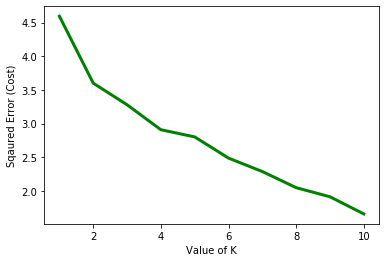

In [29]:
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans 

Calgary_grouped_clustering = Calgary_grouped.drop('Neighborhood', 1)
cost = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state = 0).fit(Calgary_grouped_clustering)
    cost.append(kmeanModel.inertia_)
    
# Plot the elbow
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

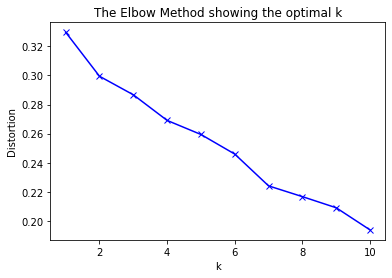

In [30]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(Calgary_grouped_clustering)
    kmeanModel.fit(Calgary_grouped_clustering)
    distortions.append(sum(np.min(cdist(Calgary_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Calgary_grouped_clustering.shape[0])

#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Notice that due to the areas we studied have limited numbers(34), the elbow in this case cannot be located accurately, which can be soure of error for this project.

In [31]:
# set number of clusters
kclusters = 7

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Calgary_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_


array([0, 1, 0, 0, 0, 0, 6, 6, 0, 5, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 6, 6, 0, 0, 0, 0, 0, 6, 2], dtype=int32)

In [32]:
# add clustering labels
neighborhoods_venues_sorted_copy.insert(0, 'Cluster Labels', kmeans.labels_)

Calgary_merged = df_calgary

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Calgary_merged = Calgary_merged.join(neighborhoods_venues_sorted_copy.set_index('Neighborhood'), on='Neighborhood')

Calgary_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,T1Y,Calgary,"Rundle, Whitehorn, Monterey Park",51.0759,-114.0015,0,Vietnamese Restaurant,Hotel,American Restaurant,Burger Joint,Health & Beauty Service,Rental Car Location,Automotive Shop,Ramen Restaurant,Pub,Pizza Place
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320,6,Convenience Store,Vietnamese Restaurant,Fast Food Restaurant,Noodle House,Bank,Yoga Studio,Food Court,Gas Station,Furniture / Home Store,Frozen Yogurt Shop
2,T2B,Calgary,"Forest Lawn, Dover, Erin Woods",51.0318,-113.9786,0,Convenience Store,Smoke Shop,Sandwich Place,Bar,Bank,Falafel Restaurant,Fried Chicken Joint,Coffee Shop,Indian Restaurant,Thrift / Vintage Store
3,T2C,Calgary,"Lynnwood Ridge, Ogden, Foothills Industrial, G...",50.9878,-114.0001,0,Convenience Store,Diner,Clothing Store,Theater,Pizza Place,Falafel Restaurant,Food Truck,Gas Station,Furniture / Home Store,Frozen Yogurt Shop
4,T2E,Calgary,"Bridgeland, Greenview, Zoo, YYC",51.0632,-114.0614,0,Noodle House,Chinese Restaurant,Scenic Lookout,Vietnamese Restaurant,Sandwich Place,Japanese Restaurant,Pub,Middle Eastern Restaurant,Bank,Coffee Shop


In [33]:
# create map
# map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
# x = np.arange(kclusters)
# ys = [i + x + (i*x)**2 for i in range(kclusters)]
# colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
# rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
# markers_colors = []
# for lat, lon, poi, cluster in zip(Calgary_merged['Latitude'], Calgary_merged['Longitude'], Calgary_merged['Neighborhood'], Calgary_merged['Cluster Labels']):
#     label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
#     folium.CircleMarker(
#         [lat, lon],
#         radius=5,
#         popup=label,
#         color=rainbow[cluster-1],
#         fill=True,
#         fill_color=rainbow[cluster-1],
#         fill_opacity=0.7).add_to(map_clusters)
       
# map_clusters

### 3.5 Define the tag for each cluster

In [34]:
count_venue = Calgary_merged
count_venue = count_venue.drop(['PostalCode', 'Borough', 'Neighborhood', 'Latitude', 'Longitude'], axis=1)
count_venue = count_venue.groupby(['Cluster Labels','1st Most Common Venue']).size().reset_index(name='Counts')

#we can transpose it to plot bar chart
cv_cluster = count_venue.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Counts')
cv_cluster = cv_cluster.fillna(0).astype(int).reset_index(drop=True)
cv_cluster

1st Most Common Venue,American Restaurant,Bar,Bowling Alley,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Discount Store,Elementary School,Fast Food Restaurant,Flea Market,Food Truck,Gas Station,Gift Shop,Hotel,Ice Cream Shop,Indian Restaurant,Noodle House,Park,Pharmacy,Pizza Place,Pool,Pub,Restaurant,Vietnamese Restaurant
0,1,0,1,1,5,1,2,1,0,1,0,1,0,1,1,1,1,1,0,0,1,0,2,1,1
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


Text(0, 0.5, 'Number of venues')

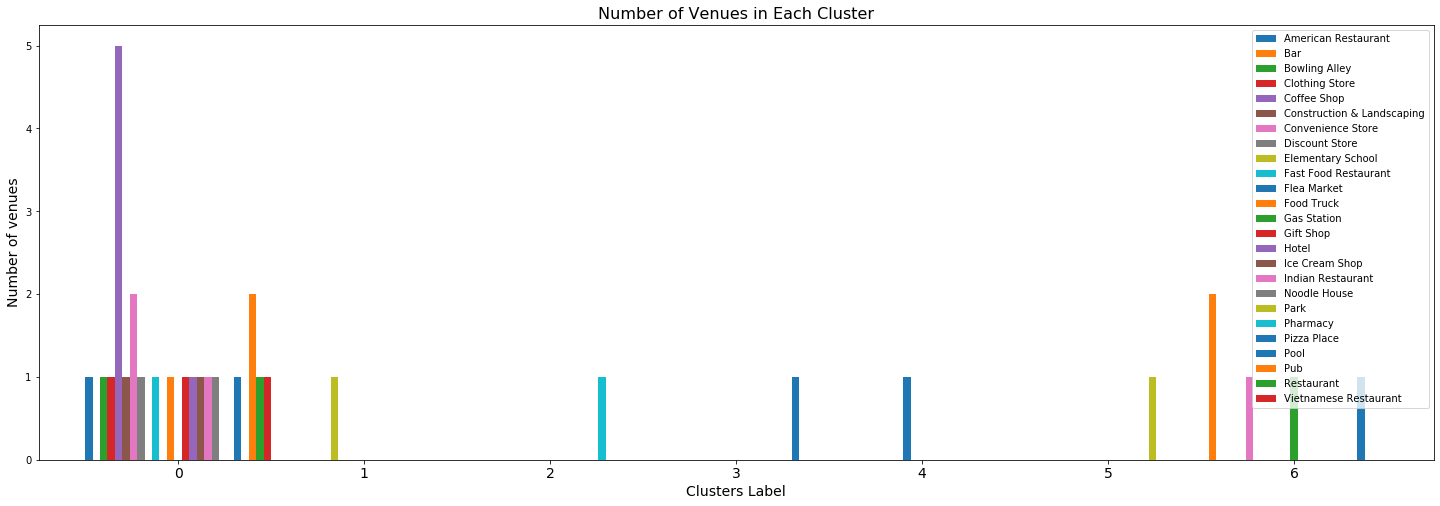

In [67]:
#creating a bar chart of "Number of Venues in Each Cluster"
bin_colors = []
for i in range(21):
    bin_colors.append('C{}'.format(str(i)))
    
frame=cv_cluster.plot(kind='bar',figsize=(25,8),width = 1, color = bin_colors)

plt.legend(labels=cv_cluster.columns,fontsize= 10,loc='upper right')
plt.title("Number of Venues in Each Cluster",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Clusters Label', fontsize=14)
plt.ylabel('Number of venues', fontsize=14)

In [36]:
Cluster_labels = {'Clusters': [0,1,2,3,4,5,6], 'Labels': ['Hockey Rink Venue','Playground and Liquor Store Venue','Pool and Gas Station Venue', 'Mixed Social Venue', 'Pizza Place Venue', 'Flea Market Venue', 'Skating Rink Venue']}
Cluster_labels = pd.DataFrame(data=Cluster_labels)
Cluster_labels

,Clusters,Labels
0,0,Hockey Rink Venue
1,1,Playground and Liquor Store Venue
2,2,Pool and Gas Station Venue
3,3,Mixed Social Venue
4,4,Pizza Place Venue
5,5,Flea Market Venue
6,6,Skating Rink Venue


### 3.6. Classify each area based on the average house renting price

In [37]:
df_rent = pd.read_csv('Calgary_Average_Rental.csv')

Calgary_rent = Calgary_merged

Calgary_rent = Calgary_rent.join(df_rent.set_index('PostalCode'), on='PostalCode')

Calgary_rent


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Average_Renting_Price
0,T1Y,Calgary,"Rundle, Whitehorn, Monterey Park",51.0759,-114.0015,0,Vietnamese Restaurant,Hotel,American Restaurant,Burger Joint,Health & Beauty Service,Rental Car Location,Automotive Shop,Ramen Restaurant,Pub,Pizza Place,1273
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320,6,Convenience Store,Vietnamese Restaurant,Fast Food Restaurant,Noodle House,Bank,Yoga Studio,Food Court,Gas Station,Furniture / Home Store,Frozen Yogurt Shop,1258
2,T2B,Calgary,"Forest Lawn, Dover, Erin Woods",51.0318,-113.9786,0,Convenience Store,Smoke Shop,Sandwich Place,Bar,Bank,Falafel Restaurant,Fried Chicken Joint,Coffee Shop,Indian Restaurant,Thrift / Vintage Store,1192
3,T2C,Calgary,"Lynnwood Ridge, Ogden, Foothills Industrial, G...",50.9878,-114.0001,0,Convenience Store,Diner,Clothing Store,Theater,Pizza Place,Falafel Restaurant,Food Truck,Gas Station,Furniture / Home Store,Frozen Yogurt Shop,1348
4,T2E,Calgary,"Bridgeland, Greenview, Zoo, YYC",51.0632,-114.0614,0,Noodle House,Chinese Restaurant,Scenic Lookout,Vietnamese Restaurant,Sandwich Place,Japanese Restaurant,Pub,Middle Eastern Restaurant,Bank,Coffee Shop,988
5,T2G,Calgary,"Inglewood, Burnsland, Chinatown, East Victoria...",51.0415,-114.0599,0,Pub,Restaurant,Hotel,Coffee Shop,Performing Arts Venue,Theater,Steakhouse,New American Restaurant,Music Venue,Gym,1352
6,T2H,Calgary,"Highfield, Burns Industrial",50.9857,-114.0631,0,American Restaurant,Korean Restaurant,Restaurant,Sushi Restaurant,Furniture / Home Store,Department Store,Grocery Store,Gas Station,Gun Shop,Filipino Restaurant,1215
7,T2J,Calgary,"Queensland, Lake Bonavista, Willow Park, Acadia",50.9693,-114.0514,6,Pool,Convenience Store,Gym / Fitness Center,Gas Station,Embassy / Consulate,Falafel Restaurant,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,1401
8,T2K,Calgary,"Thorncliffe, Tuxedo Park",51.0857,-114.0714,6,Bar,Ice Cream Shop,Vietnamese Restaurant,Convenience Store,Food & Drink Shop,Gas Station,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,1172
9,T2L,Calgary,"Brentwood, Collingwood, Nose Hill",51.0917,-114.1127,1,Elementary School,Building,Hockey Rink,Sporting Goods Shop,Yoga Studio,Food Truck,Gas Station,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,1099


In [69]:
data_test = pd.DataFrame(Calgary_rent['PostalCode'], columns = ['PostalCode'])
data_test['Neighborhood'] = Calgary_rent['Neighborhood']
data_test['Cluster Labels'] = Calgary_rent['Cluster Labels']
data_test['Average_Renting_Price'] = Calgary_rent['Average_Renting_Price']

data_test = data_test.sort_values('Average_Renting_Price').reset_index(drop=True)

data_test

,PostalCode,Neighborhood,Cluster Labels,Average_Renting_Price
0,T3J,"Martindale, Taradale, Falconridge, Saddle Ridge",0,660
1,T2E,"Bridgeland, Greenview, Zoo, YYC",0,988
2,T3R,Northwest Calgary,4,1027
3,T3P,Symons Valley,0,1042
4,T3L,"Tuscany, Scenic Acres",2,1045
5,T3K,"Sandstone, MacEwan Glen, Beddington, Harvest H...",0,1054
6,T3A,"Dalhousie, Edgemont, Hamptons, Hidden Valley",6,1073
7,T3G,"Hawkwood, Arbour Lake, Citadel, Ranchlands, Ro...",3,1090
8,T2L,"Brentwood, Collingwood, Nose Hill",1,1099
9,T2V,"Oak Ridge, Haysboro, Kingsland, Kelvin Grove, ...",0,1134


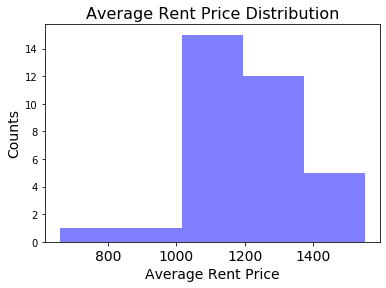

In [39]:
num_bins = 5
n, bins, patches = plt.hist(data_test['Average_Renting_Price'], num_bins, facecolor='blue', alpha=0.5)
plt.title("Average Rent Price Distribution",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Average Rent Price', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()

In [40]:
bins = np.linspace(min(Calgary_rent["Average_Renting_Price"]), max(Calgary_rent["Average_Renting_Price"]), 6)
bins

array([ 660.,  838., 1016., 1194., 1372., 1550.])

In [41]:
group_names = ['Low level', 'Below Average', 'Average level', 'Above Average','High level']

In [42]:
Calgary_rent['Price-Categories'] = pd.cut(Calgary_rent['Average_Renting_Price'], bins, labels=group_names, include_lowest=True )
Calgary_rent[['Average_Renting_Price','Price-Categories']]

,Average_Renting_Price,Price-Categories
0,1273,Above Average
1,1258,Above Average
2,1192,Average level
3,1348,Above Average
4,988,Below Average
5,1352,Above Average
6,1215,Above Average
7,1401,High level
8,1172,Average level
9,1099,Average level


### 3.7 Get the distance from the city center 

In [43]:
# To get the distance between each area and the center of Calgary, let's first define a function
# The funtion will take the latitude and the longitude of the two points and calculate the distance between them
from math import radians, cos, sin, asin, sqrt 
def distance(lat1, lat2, lon1, lon2): 
      
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # Radius of earth in kilometers. Use 3956 for miles 
    r = 6371
       
    # calculate the result 
    return(c * r)

In [44]:
Calgary_lat = 51.0534234
Calgary_lon = -114.0625892
# The center coordinates of Calgary have already been found in the first section

Distance_from_center = []
# Distance_from_center.append(distance(Calgary_lat, Calgary_rent['Latitude'], Calgary_lon, Calgary_rent['Longitude']))

Lat = []
for item in Calgary_rent['Latitude']:
    Lat.append(float(item))
    
Lon = []
for item in Calgary_rent['Longitude']:
    Lon.append(float(item))
    
for i in range(len(Lat)):
    Distance_from_center.append(distance(Calgary_lat, Lat[i], Calgary_lon, Lon[i]))

Calgary_rent['Distance From Center(KM)'] = Distance_from_center

Calgary_rent

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Average_Renting_Price,Price-Categories,Distance From Center(KM)
0,T1Y,Calgary,"Rundle, Whitehorn, Monterey Park",51.0759,-114.0015,0,Vietnamese Restaurant,Hotel,American Restaurant,Burger Joint,Health & Beauty Service,Rental Car Location,Automotive Shop,Ramen Restaurant,Pub,Pizza Place,1273,Above Average,4.946702
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320,6,Convenience Store,Vietnamese Restaurant,Fast Food Restaurant,Noodle House,Bank,Yoga Studio,Food Court,Gas Station,Furniture / Home Store,Frozen Yogurt Shop,1258,Above Average,6.881563
2,T2B,Calgary,"Forest Lawn, Dover, Erin Woods",51.0318,-113.9786,0,Convenience Store,Smoke Shop,Sandwich Place,Bar,Bank,Falafel Restaurant,Fried Chicken Joint,Coffee Shop,Indian Restaurant,Thrift / Vintage Store,1192,Average level,6.345139
3,T2C,Calgary,"Lynnwood Ridge, Ogden, Foothills Industrial, G...",50.9878,-114.0001,0,Convenience Store,Diner,Clothing Store,Theater,Pizza Place,Falafel Restaurant,Food Truck,Gas Station,Furniture / Home Store,Frozen Yogurt Shop,1348,Above Average,8.505917
4,T2E,Calgary,"Bridgeland, Greenview, Zoo, YYC",51.0632,-114.0614,0,Noodle House,Chinese Restaurant,Scenic Lookout,Vietnamese Restaurant,Sandwich Place,Japanese Restaurant,Pub,Middle Eastern Restaurant,Bank,Coffee Shop,988,Below Average,1.090281
5,T2G,Calgary,"Inglewood, Burnsland, Chinatown, East Victoria...",51.0415,-114.0599,0,Pub,Restaurant,Hotel,Coffee Shop,Performing Arts Venue,Theater,Steakhouse,New American Restaurant,Music Venue,Gym,1352,Above Average,1.339083
6,T2H,Calgary,"Highfield, Burns Industrial",50.9857,-114.0631,0,American Restaurant,Korean Restaurant,Restaurant,Sushi Restaurant,Furniture / Home Store,Department Store,Grocery Store,Gas Station,Gun Shop,Filipino Restaurant,1215,Above Average,7.530583
7,T2J,Calgary,"Queensland, Lake Bonavista, Willow Park, Acadia",50.9693,-114.0514,6,Pool,Convenience Store,Gym / Fitness Center,Gas Station,Embassy / Consulate,Falafel Restaurant,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,1401,High level,9.386792
8,T2K,Calgary,"Thorncliffe, Tuxedo Park",51.0857,-114.0714,6,Bar,Ice Cream Shop,Vietnamese Restaurant,Convenience Store,Food & Drink Shop,Gas Station,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,1172,Average level,3.641412
9,T2L,Calgary,"Brentwood, Collingwood, Nose Hill",51.0917,-114.1127,1,Elementary School,Building,Hockey Rink,Sporting Goods Shop,Yoga Studio,Food Truck,Gas Station,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,1099,Average level,5.511155


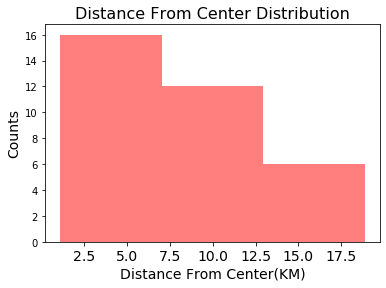

In [45]:
num_bins2 = 3
n, bins, patches = plt.hist(Calgary_rent['Distance From Center(KM)'], num_bins2, facecolor='red', alpha=0.5)
plt.title("Distance From Center Distribution",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Distance From Center(KM)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()

In [46]:
bins2 = np.linspace(min(Calgary_rent['Distance From Center(KM)']), max(Calgary_rent['Distance From Center(KM)']), 4)

group_names2 = ['Close range', 'Medium range', 'Relatively far']

Calgary_rent['DFC-Categories'] = pd.cut(Calgary_rent['Distance From Center(KM)'], bins2, labels=group_names2, include_lowest=True )
Calgary_rent[['Distance From Center(KM)','DFC-Categories']]

,Distance From Center(KM),DFC-Categories
0,4.946702,Close range
1,6.881563,Close range
2,6.345139,Close range
3,8.505917,Medium range
4,1.090281,Close range
5,1.339083,Close range
6,7.530583,Medium range
7,9.386792,Medium range
8,3.641412,Close range
9,5.511155,Close range


### 3.8 Get the top five venues in the specific area

In [47]:
top5 = Calgary_venues.groupby(['Neighborhood','Venue Category']).size().reset_index(name='Counts')
top5 = top5.sort_values(['Neighborhood','Counts'],ascending=False).groupby('Neighborhood').head(5).reset_index(drop=True)

top5['Top5'] = top5['Counts'].map(str) + " " + top5['Venue Category']
top5 = top5.groupby(['Neighborhood'])['Top5'].apply(", ".join).reset_index()

top5.head()

,Neighborhood,Top5
0,"Braeside, Cedarbrae, Woodbine","1 Coffee Shop, 1 Convenience Store, 1 Gym, 1 H..."
1,"Brentwood, Collingwood, Nose Hill","1 Building, 1 Elementary School, 1 Hockey Rink..."
2,"Bridgeland, Greenview, Zoo, YYC","3 Chinese Restaurant, 3 Noodle House, 2 Bank, ..."
3,"City Centre, Calgary Tower","7 Coffee Shop, 5 Pub, 4 Restaurant, 3 Bakery, ..."
4,"Connaught, West Victoria Park","8 Restaurant, 4 Coffee Shop, 4 Italian Restaur..."



## 4. Results and Discussion<a name="results"></a>

### 4.1 Results

In [48]:
result= pd.merge(Calgary_rent, Cluster_labels[['Clusters', 'Labels']], left_on = 'Cluster Labels', right_on = 'Clusters', how = 'left')

result= pd.merge(result, top5[['Neighborhood', 'Top5']], left_on = 'Neighborhood', right_on = 'Neighborhood', how = 'left')

result
# Calgary_rent

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Average_Renting_Price,Price-Categories,Distance From Center(KM),DFC-Categories,Clusters,Labels,Top5
0,T1Y,Calgary,"Rundle, Whitehorn, Monterey Park",51.0759,-114.0015,0,Vietnamese Restaurant,Hotel,American Restaurant,Burger Joint,Health & Beauty Service,Rental Car Location,Automotive Shop,Ramen Restaurant,Pub,Pizza Place,1273,Above Average,4.946702,Close range,0,Hockey Rink Venue,"5 Vietnamese Restaurant, 4 Hotel, 3 American R..."
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320,6,Convenience Store,Vietnamese Restaurant,Fast Food Restaurant,Noodle House,Bank,Yoga Studio,Food Court,Gas Station,Furniture / Home Store,Frozen Yogurt Shop,1258,Above Average,6.881563,Close range,6,Skating Rink Venue,"2 Convenience Store, 1 Bank, 1 Fast Food Resta..."
2,T2B,Calgary,"Forest Lawn, Dover, Erin Woods",51.0318,-113.9786,0,Convenience Store,Smoke Shop,Sandwich Place,Bar,Bank,Falafel Restaurant,Fried Chicken Joint,Coffee Shop,Indian Restaurant,Thrift / Vintage Store,1192,Average level,6.345139,Close range,0,Hockey Rink Venue,"3 Convenience Store, 2 Bar, 2 Sandwich Place, ..."
3,T2C,Calgary,"Lynnwood Ridge, Ogden, Foothills Industrial, G...",50.9878,-114.0001,0,Convenience Store,Diner,Clothing Store,Theater,Pizza Place,Falafel Restaurant,Food Truck,Gas Station,Furniture / Home Store,Frozen Yogurt Shop,1348,Above Average,8.505917,Medium range,0,Hockey Rink Venue,"1 Clothing Store, 1 Convenience Store, 1 Diner..."
4,T2E,Calgary,"Bridgeland, Greenview, Zoo, YYC",51.0632,-114.0614,0,Noodle House,Chinese Restaurant,Scenic Lookout,Vietnamese Restaurant,Sandwich Place,Japanese Restaurant,Pub,Middle Eastern Restaurant,Bank,Coffee Shop,988,Below Average,1.090281,Close range,0,Hockey Rink Venue,"3 Chinese Restaurant, 3 Noodle House, 2 Bank, ..."
5,T2G,Calgary,"Inglewood, Burnsland, Chinatown, East Victoria...",51.0415,-114.0599,0,Pub,Restaurant,Hotel,Coffee Shop,Performing Arts Venue,Theater,Steakhouse,New American Restaurant,Music Venue,Gym,1352,Above Average,1.339083,Close range,0,Hockey Rink Venue,"8 Pub, 7 Restaurant, 6 Coffee Shop, 6 Hotel, 4..."
6,T2H,Calgary,"Highfield, Burns Industrial",50.9857,-114.0631,0,American Restaurant,Korean Restaurant,Restaurant,Sushi Restaurant,Furniture / Home Store,Department Store,Grocery Store,Gas Station,Gun Shop,Filipino Restaurant,1215,Above Average,7.530583,Medium range,0,Hockey Rink Venue,"3 American Restaurant, 2 Department Store, 2 F..."
7,T2J,Calgary,"Queensland, Lake Bonavista, Willow Park, Acadia",50.9693,-114.0514,6,Pool,Convenience Store,Gym / Fitness Center,Gas Station,Embassy / Consulate,Falafel Restaurant,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,1401,High level,9.386792,Medium range,6,Skating Rink Venue,"1 Convenience Store, 1 Gas Station, 1 Gym / Fi..."
8,T2K,Calgary,"Thorncliffe, Tuxedo Park",51.0857,-114.0714,6,Bar,Ice Cream Shop,Vietnamese Restaurant,Convenience Store,Food & Drink Shop,Gas Station,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,1172,Average level,3.641412,Close range,6,Skating Rink Venue,"1 Bar, 1 Convenience Store, 1 Ice Cream Shop, ..."
9,T2L,Calgary,"Brentwood, Collingwood, Nose Hill",51.0917,-114.1127,1,Elementary School,Building,Hockey Rink,Sporting Goods Shop,Yoga Studio,Food Truck,Gas Station,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,1099,Average level,5.511155,Close range,1,Playground and Liquor Store Venue,"1 Building, 1 Elementary School, 1 Hockey Rink..."


In [78]:
# create map
map_result = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, top5, cluster_number, rent_price_label, Distance_label in zip(result['Latitude'], result['Longitude'], result['Neighborhood'], result['Labels'], result['Top5'], result['Cluster Labels'], result['Price-Categories'], result['DFC-Categories']):
    label = folium.Popup('Neighborhood: ' + str(poi) + " // " + 'Venue Type: ' + str(cluster) + " // " + 'House rental price label: ' + str(rent_price_label) + ' // ' + 'Distance from center: ' + str(Distance_label) + " // " + 'Top 5 Venues: ' + str(top5), max_width=450, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color= rainbow[cluster_number-1],
        popup=label,
        fill_color = rainbow[cluster_number-1],
        fill_opacity=1).add_to(map_result)
       
map_result

### 4.2 Discussion

As shown in the results section, people can quickly obtain information, including neighborhood names, venue type, house rental, distance from the city center, and the top five most common venues. One can quickly establish a general understanding of different Calgary areas by simply clicking the markers on the map. The information provided by this project will have a positive impact in assisting newcomers in deciding where to rent a house in Calgary. However, there are some limitations exist, which will be explained as follows.

First of all, I collected the neighborhood data based on postal codes. Neighborhoods with the same postal code are combined into an area. Therefore, one marker on the map might represent one or more neighborhoods. Although the complexity of collecting and cleaning data has been greatly reduced using this method, the accuracy of data could be limited. It could provide a general understanding of different areas in Calgary to people, but further analysis and more data would be needed if one requires information for a specific neighborhood in Calgary.

Besides, when finding the optimal K value for the K-means algorithm, the elbow method has been used. However, only 34 areas are included, which leads to difficulties locating the elbow. With the need for higher accuracy, the current data set could be expanded.

For the average house rental prices, data was collected using the Rentometer platform and transformed into a CSV file. However, the average house renting prices in an area could vary every month. Therefore, in future studies, the data could be directly obtained from the platform to remain up to date.


## 5. Conclusion<a name="conclusion"></a>

In this study, I analyzed the average house rental prices in Calgary. I have successfully completed this project and visualized the results on the map. This project would be helpful for people who want to rent a house in Calgary. One can quickly establish a general understanding of different Calgary areas by simply clicking the markers on the map. People can quickly obtain information such as neighborhood names, venue type, house rental, distance from the city center, and the top five most common venues, which helps them decide where to rent a house in Calgary. 